In [4]:
# importing libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
%matplotlib inline
from scipy.stats import ttest_1samp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [18]:
df_student=pd.read_csv('student.csv')
df_student.head(1)

,stud.id,name,gender,age,height,weight,religion,nc.score,semester,major,minor,score1,score2,online.tutorial,graduated,salary
1,833917,"Gonzales, Christina",Female,19,160,64.8,Muslim,1.91,1st,Political Science,Social Sciences,NaN,NaN,0,0,NaN


In [15]:
df_student.columns

Index(['gender', 'age', 'height', 'weight', 'religion', 'nc.score', 'semester',
       'major', 'minor', 'score1', 'score2', 'online.tutorial', 'graduated',
       'salary'],
      dtype='object')

In [11]:
df_student.drop(columns={'stud.id','name'},axis=1, inplace=True)

In [22]:
df_student.describe()

,stud.id,age,height,weight,nc.score,score1,score2,online.tutorial,graduated,salary
count,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,4892.000000,4892.000000,8239.000000,8239.000000,1753.000000
mean,548910.484525,22.541571,171.380750,72.998131,2.166481,68.164963,69.494685,0.386212,0.212769,42522.112364
std,253849.389811,6.065111,11.077529,8.635162,0.811548,14.051762,14.395251,0.486910,0.409290,10333.139906
min,110250.000000,18.000000,135.000000,51.400000,1.000000,30.000000,31.000000,0.000000,0.000000,11444.141653
25%,331222.500000,20.000000,163.000000,66.500000,1.460000,58.000000,59.000000,0.000000,0.000000,35206.541598
50%,545132.000000,21.000000,171.000000,71.800000,2.040000,70.000000,71.000000,0.000000,0.000000,41672.009748
75%,770807.500000,23.000000,180.000000,78.500000,2.780000,78.000000,80.000000,1.000000,0.000000,49372.540906
max,989901.000000,64.000000,206.000000,116.000000,4.000000,97.000000,98.000000,1.000000,1.000000,75596.793441


In [19]:
# checking whether the data is normally distributed 
# checking whether the numeric columns are normally distributed or not
import scipy.stats as stats 
normal_dis=[]
not_normaldis=[]
for col in df_student.select_dtypes(include=['float64','int64']).columns:
    stat, p = stats.shapiro(df_student[col])
    #print(f'Column {col}: p-value={p:.4f}')
    if p > 0.05:
        normal_dis.append(col)
        #print(f'Column {col} is normally distributed')
    else:
        not_normaldis.append(col)
print("The Normal ditst,:",normal_dis)
print("The NOT_Normal ditst,:",not_normaldis)
        #print(f'Column {col} is not normally distributed')

The Normal ditst,: ['score1', 'score2', 'salary']
The NOT_Normal ditst,: ['stud.id', 'age', 'height', 'weight', 'nc.score', 'online.tutorial', 'graduated']


c:\Users\kanak\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


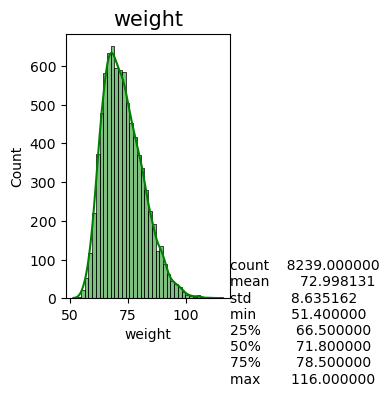

In [20]:
def desc_num_feature(columns=None, bins=40, edgecolor='k', figsize=(4,4), **kwargs):
    if columns is None:
        raise ValueError("Please provide one or more columns.")
    
    num_columns = len(columns)
    fig, axes = plt.subplots(nrows=1, ncols=num_columns, figsize=(figsize[0]*num_columns, figsize[1]))
    
    for i, column in enumerate(columns):
        ax = axes[i] if num_columns > 1 else axes
        sns.histplot(df_student[column], bins=bins, kde=True, color='green', edgecolor=edgecolor, ax=ax, **kwargs)
        ax.set_title(column, size=15)
        desc_text = df_student[column].describe().to_string()
        ax.text(1, 0.15, desc_text, size=10, transform=ax.transAxes, verticalalignment='top')
    
    plt.tight_layout()

# Example usage
desc_num_feature(columns=['weight'])
plt.show()

In [13]:
df_student.dropna(inplace=True)

In [21]:
# one sample t- test 
# Sample data
# Population mean to test against
population_mean = 70.8
# Perform one-sample t-test
t_statistic, p_value = ttest_1samp(df_student['weight'], population_mean)
# Output results
print("One-sample t-test:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)


One-sample t-test:
t-statistic: 23.105763152371566
p-value: 1.6709961011966602e-114


In [27]:
# ques2
df_score = df_student[(df_student['online.tutorial'] == 1) & (df_student['score1'].notnull()) & (df_student['score2'].notnull())][['name','score1','score2','online.tutorial']]
from scipy.stats import ttest_rel
test_statistic, p_value = ttest_rel(df_score['score1'],
df_score['score2'], alternative='less')
print(p_value)

8.946942058314536e-77


In [28]:
students_score_no_tutorial = df_student[(df_student['online.tutorial'] == 0) &(df_student['score1'].notnull()) & (df_student['score2'].notnull())][['name','score1','score2','online.tutorial']]
test_statistic, p_value = ttest_rel(students_score_no_tutorial['score1'],students_score_no_tutorial['score2'], alternative='less')
print(p_value)

0.7232359247303264


In [29]:
#ques3
df_male = df_student[(df_student['gender'] == 'Male') & (df_student['salary'].notnull())].sample(n=500)[['name', 'gender','salary']]
df_female = df_student[(df_student['gender'] == 'Female') & (df_student['salary'].notnull())].sample(n=500)[['name', 'gender','salary']]
from scipy.stats import ttest_ind
test_statistic, p_value = ttest_ind(df_male['salary'], df_female['salary'],alternative='greater')
print(p_value)


4.6263625269778946e-67


In [23]:
df_student['major'].unique()

array(['Political Science', 'Social Sciences', 'Environmental Sciences',
       'Economics and Finance', 'Mathematics and Statistics', 'Biology'],
      dtype=object)

In [26]:
#Question 4: Anova test 

from scipy.stats import f_oneway
group_a = df_student[(df_student['major'] == 'Biology') & (df_student['salary'].notnull())][['name','major','salary']]
group_b = df_student[(df_student['major'] == 'Economics and Finance') & (df_student['salary'].notnull())][['name','major','salary']]
group_c = df_student[(df_student['major'] == 'Environmental Sciences') & (df_student['salary'].notnull())][['name','major','salary']]
group_d = df_student[(df_student['major'] == 'Mathematics and Statistics') & (df_student['salary'].notnull())][['name','major','salary']]
group_e = df_student[(df_student['major'] == 'Political Science') & (df_student['salary'].notnull())][['name','major','salary']]
group_f = df_student[(df_student['major'] == 'Social Sciences') &(df_student['salary'].notnull())][['name','major','salary']]

f_statistic, p_value = f_oneway(group_a['salary'], group_b['salary'],group_c['salary'],group_d['salary'],group_e['salary'],group_f['salary'])
# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 242.50048028069665
p-value: 5.524326632416886e-197


In [38]:
#question 5
religion_count = pd.DataFrame(df_student['religion'].value_counts()).reset_index()
# Rename the columns
religion_count.columns = ['religion', 'observed_count']
religion_count


,religion,observed_count
0,Catholic,2797
1,Other,2688
2,Protestant,1839
3,Orthodox,585
4,Muslim,330


In [39]:
religion = ['Catholic', 'Muslim', 'Orthodox', 'Other', 'Protestant']
rel_freq = [0.48, 0.02, 0.08,0.30, 0.12]
df_rel_freq = pd.DataFrame({'religion' : religion, 'rel_freq': rel_freq})
df_rel_freq['expected_count'] = df_rel_freq['rel_freq'] * df_student.shape[0]
df_rel_freq

,religion,rel_freq,expected_count
0,Catholic,0.48,3954.72
1,Muslim,0.02,164.78
2,Orthodox,0.08,659.12
3,Other,0.30,2471.70
4,Protestant,0.12,988.68


In [40]:
df_rel_freq =df_rel_freq.merge(religion_count, on='religion',how='inner')

In [41]:
from scipy.stats import chisquare
test_statistic, p_value = chisquare(df_rel_freq['observed_count'],df_rel_freq['expected_count'])
print(p_value)

3.226950560350011e-272


In [42]:
# question 6 : the ans with chi square its  null hytophesis is no relation , so they are highly related to 
df_major = pd.crosstab(df_student['major'], df_student['gender'])
from scipy.stats import chi2_contingency
test_statistic, p_value, x, c = chi2_contingency(df_major)
print(p_value)

5.501737149286338e-187


In [5]:
from PythonProgramming import summation


print(summation(5))
#print(summation(4))

15


In [1]:
pip install schedule


  Obtaining dependency information for schedule from https://files.pythonhosted.org/packages/f0/1a/e5a65c08d708ee4c002f3f938ba69b2282af478755700c40f037eacc92ef/schedule-1.2.1-py2.py3-none-any.whl.metadata


In [6]:
from PythonProgramming import process_files

print(process_files())

Processing file: C:/Users/kanak/Desktop/Semester 2/BANA622_ProgramBusinessAnalytics\diamonds.csv
       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   27